# Workshop 02 - Advanced Classification

1. Generating Toy Data
2. Support Vector Machines
3. Kernelized Support Vector Machines

In [43]:
from matplotlib import pyplot
from pandas import DataFrame
from drawdata import ScatterWidget

from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Generating test data

Why is the generation of test data important?

1. We can generate quickly and easiliy data that suits our needs (e.g., emulates real world data)
2. We can force "known" and "understood" outcomes for comparison with predictions
3. We can impude stochastic randomness based on our needs
4. We can visualize it easiliy 
5. We can scale it up quickly

### Generating Test data for classification

Documentation: https://scikit-learn.org/stable/api/sklearn.datasets.html

#### Blob Data

In [2]:
# generate 2d classification dataset
from sklearn.datasets import make_blobs

# n_samples  = 100 => 100 data points
# centers    = 3   => 3 "clusters"
# n_features = 2   => 2 independent variables
# cluster_std = 1.0 => Standard deviation of the clusters  
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.1)

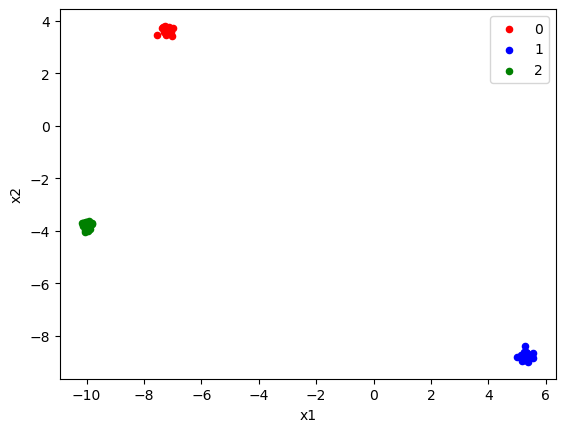

In [3]:
# Plot data
from sklearn.datasets import make_blobs

# Create dictionary based on toy data
tmp_dict = dict(x1=X[:,0], x2=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

#### Moons Data

In [4]:
# generate 2d classification dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.01)

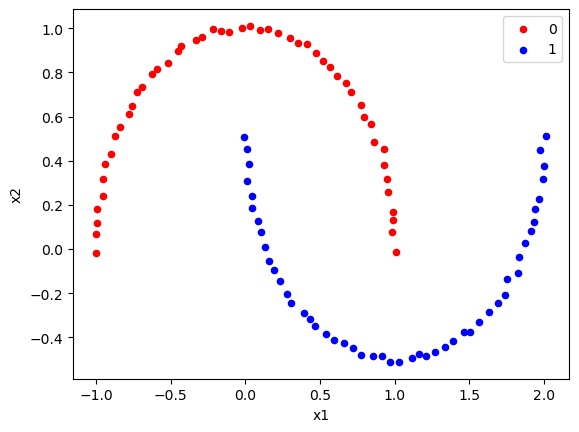

In [5]:
# Plot data
# Create dictionary based on toy data
tmp_dict = dict(x1=X[:,0], x2=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])

####  Advanced classification data

In [6]:
# generate 2d classification dataset
from sklearn.datasets import make_classification

# n_redundant - The number of redundant features. These features are generated as random linear combinations of the informative features
# n_informativeint, optional (default=2) - The number of informative features
# n_classes - Number of classes
# n_cluster_per_class - clusters within class
X, y = make_classification(n_samples=100, n_features = 2, n_redundant=0, n_informative=2, n_classes = 2,  n_clusters_per_class=2)



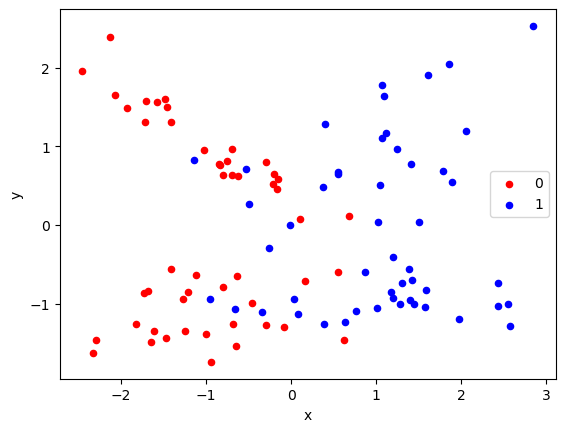

In [7]:
# Plot data
# Create dictionary based on toy data
tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [8]:
# generate 2d classification dataset
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.1)

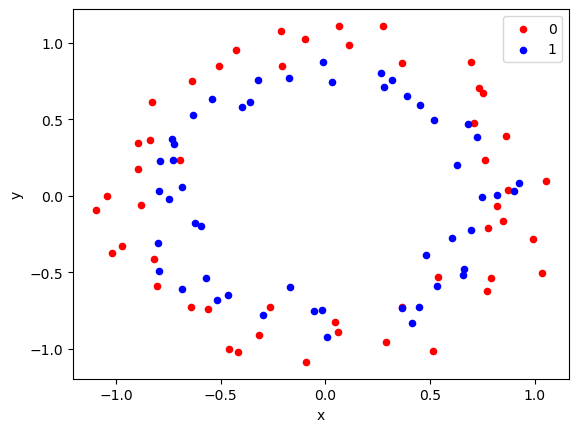

In [9]:
# Plot data
# Create dictionary based on toy data
tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

# scatter plot, dots colored by class value
df = DataFrame(tmp_dict)

# Each label will get its own coloring 
colors = {0:'red', 1:'blue', 2:'green'}

# Create figure and ax object (recall last workshop)
fig, ax = pyplot.subplots()

# Group By Labels
grouped = df.groupby('label')

# Plot each group (i.e., label)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

In [10]:
def visualize(X, y):
    # Plot data
    # Create dictionary based on toy data
    tmp_dict = dict(x=X[:,0], y=X[:,1], label=y)

    # scatter plot, dots colored by class value
    df = DataFrame(tmp_dict)

    # Each label will get its own coloring 
    colors = {0:'red', 1:'blue', 2:'green'}

    # Create figure and ax object (recall last workshop)
    fig, ax = pyplot.subplots()

    # Group By Labels
    grouped = df.groupby('label')

    # Plot each group (i.e., label)
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

#### Draw your own data!

In [11]:
widget = ScatterWidget()
widget

ScatterWidget()

In [12]:
draw_df = widget.data_as_pandas

In [13]:
draw_df

,x,y,color,label
0,98.390663,363.942863,#1f77b4,a
1,100.455901,399.236470,#1f77b4,a
2,122.001136,387.002558,#1f77b4,a
3,117.515853,394.695284,#1f77b4,a
4,157.373825,395.916441,#1f77b4,a
...,...,...,...,...
113,617.007233,245.671058,#2ca02c,c
114,614.371706,248.230159,#2ca02c,c
115,591.998200,248.137253,#2ca02c,c
116,597.400744,252.818377,#2ca02c,c


We will use `seaborn`, another visualization library that natively works together with pandas `DataFrame`s very well:

<Axes: xlabel='x', ylabel='y'>

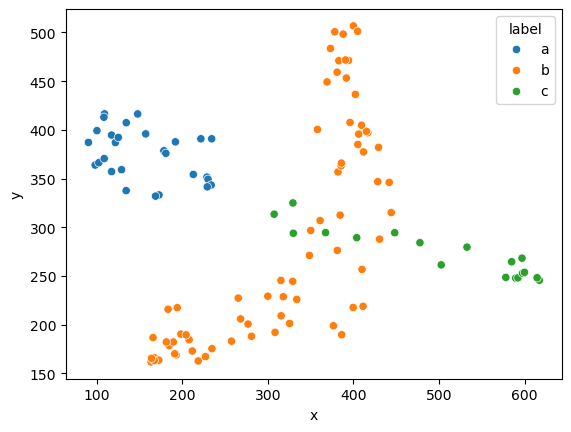

In [14]:
import seaborn as sns
sns.scatterplot(draw_df, x='x', y='y', hue='label')

## Support Vector Machines

### Linear Data - Binary Case

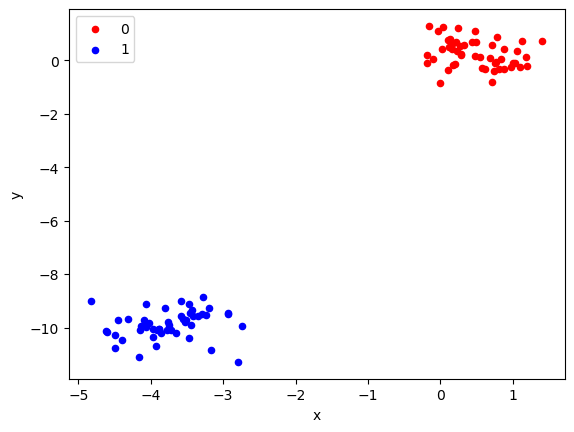

In [15]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.5)
visualize(X,y)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
# Train SVC 
model = SVC()
model.fit(X_train, y_train)

SVC()

In [17]:
# Make prediction 
y_pred = model.predict(X_test)

In [18]:
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

<img src='resources/img1.png'>

<img src='resources/img2.png'>

In [19]:
# Evaluate Model
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 8  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [20]:
# get support vectors
model.support_vectors_

array([[-1.53745194e-01,  1.29405829e+00],
       [ 7.18746403e-01, -8.09639306e-01],
       [-2.39138636e-03, -8.38817303e-01],
       [-2.80132784e+00, -1.12880063e+01],
       [-3.27599890e+00, -8.86878913e+00],
       [-4.16705662e+00, -1.11095444e+01]])

In [21]:
# get indices of support vectors
model.support_

array([16, 32, 65,  5, 26, 66], dtype=int32)

In [22]:
# get number of support vectors for each class
model.n_support_

array([3, 3], dtype=int32)

### Linear Data - Multi-Class Case

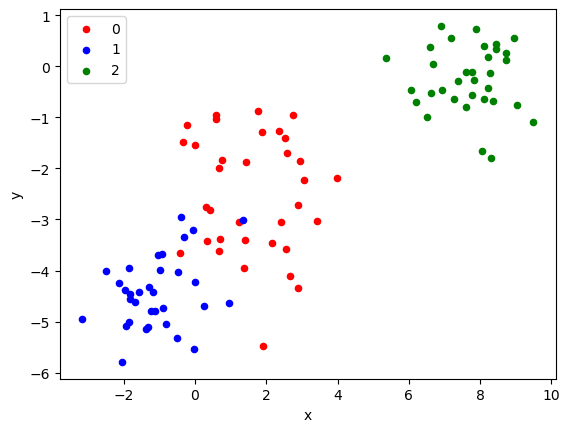

In [23]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=1.0)
visualize(X,y)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
# Model (decision_function_shape = 'ovo'; creates )
model = SVC(decision_function_shape='ovo') # N classes => N*(N-1)/2
model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [25]:
# Make prediction 
y_pred = model.predict(X_test)

In [26]:
# Evaluate Model
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[9 0 0]
 [1 6 0]
 [0 0 4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.97      0.95      0.96        20
weighted avg       0.96      0.95      0.95        20



## Kernelized Support Vector Machines

<img src='resources/img3.png'>

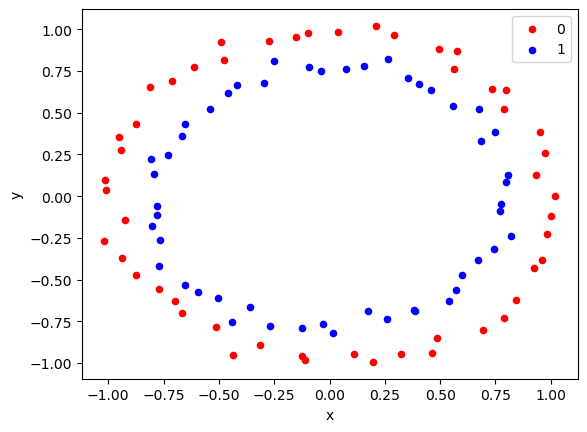

In [27]:
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.04)
visualize(X,y)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [44]:
# Train SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
# Make prediction 
y_pred = model.predict(X_test)

In [30]:
# Evaluate Model
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 0 11]
 [ 0  9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.45      1.00      0.62         9

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



/Users/janik/miniconda3/envs/AAA/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/janik/miniconda3/envs/AAA/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/janik/miniconda3/envs/AAA/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### Custom Kernels

In [31]:
def my_kernel(X, Y):
    return np.dot(X, Y.T) # whatever you want (but limited to kernel properties)

model = svm.SVC(kernel=my_kernel)

In [32]:
model.fit(X_train, y_train)

SVC(kernel=<function my_kernel at 0x1751cec00>)

In [33]:
# Make prediction 
y_pred = model.predict(X_test)

In [34]:
# Evaluate Model
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[ 0 11]
 [ 0  9]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.45      1.00      0.62         9

    accuracy                           0.45        20
   macro avg       0.23      0.50      0.31        20
weighted avg       0.20      0.45      0.28        20



/Users/janik/miniconda3/envs/AAA/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/janik/miniconda3/envs/AAA/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/janik/miniconda3/envs/AAA/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

### Using the RBF kernel to classify circular data

In [35]:
# Train SVC 
# gamma = Kernel coefficient for ‘rbf’
# if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# if ‘auto’, uses 1 / n_features.

# In detail description: 
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

# C is the cost of misclassification => Higher C => Low Bias & High Variance
# Gamma = bandwidth => Lower Gamma => Lower Bias & High Variance

# Use Grid Search to find optimal hyperparameters

#model = SVC(kernel='rbf')

model = SVC(kernel='rbf', gamma='scale', C=1)
model.fit(X_train, y_train)

SVC(C=1)

In [36]:
# Make prediction 
y_pred = model.predict(X_test)

In [37]:
# Evaluate Model
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

[[11  0]
 [ 1  8]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



## Programming Task

Think of a data distribution where complex kernels _struggle_! For this, the task is to construct a data set such that an SVM classifier with the RBF kernel performs _worse_ than a a linear classifer.

We want to utilize the toy data creation to show limits of complex kernels:
1. Using the draw data creation tool from above, create you own data set.
1. Do a train-test split (_hint: have a look at which properties `widget` from drawdata exposes_)
1. Train a SVM classifier on it with the default RBF kernel
1. Evaluate it using the relevant classification metrics.
1. Train another model, also a SVM, but use a linear kernel.
1. Again, evaluate it and compare it to the SVM model with RBF kernel.